### Ashera Dyussenova
B20-DS

In this colab we are going to explore Airbnb dataset. \\

"Airbnb Listings & Reviews" - data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

## Data Understanding


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Data Collection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#import data
df1 = pd.read_csv('/content/gdrive/MyDrive/dataset/Listings.csv', encoding='latin_1')
df2 = pd.read_csv('/content/gdrive/MyDrive/dataset/Listings_data_dictionary.csv')
df3 = pd.read_csv('/content/gdrive/MyDrive/dataset/Reviews.csv', encoding='latin_1')
df4 = pd.read_csv('/content/gdrive/MyDrive/dataset/Reviews_data_dictionary.csv')

###Data Description

In [ ]:
df1.shape

(279712, 33)

In [ ]:
df2.shape

(33, 2)

In [ ]:
df3.shape

(5373143, 4)

In [ ]:
df4.shape

(4, 2)

In [ ]:
df2 # description of atributes of main dataframe

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [ ]:
df4 # discription of second main dataframe

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [ ]:
df1.head(n=5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
df1.tail(n=5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279711,40219504,Cosy apartment with view on Canal St Martin,6955618,2013-06-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Enclos-St-Laurent,NaN,Paris,48.87217,2.36320,Entire apartment,Entire place,2,1.0,"[""Shower gel"", ""Shampoo"", ""Iron"", ""Heating"", ""...",70,2,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
df1.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

### Data Exploration

In [ ]:
df1.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 21.3 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=a2ef9d718d5be057b84bcd728266ff744c97a79c1374e3a8ee47f8b42e38ff12
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df1, minimal=True)
profile.to_file( "data_understanding_report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###Data Verification

In [24]:
df1[df1.duplicated(keep=False)]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


In [4]:
from scipy import stats
z_thr = 3.0
df1[(np.abs(stats.zscore(df1.select_dtypes(include=int))) > z_thr).any(axis=1)]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
373,1277179,50 m2 + balcony and amazing view!,3392194,2012-08-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.85161,2.39030,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Essentials"", ""Washer"",...",90,1001,1125,93.0,10.0,10.0,10.0,10.0,10.0,10.0,f
432,12107982,Appartement Bastille avec Balcon-Terrasse,21682024,2014-09-23,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.85362,2.37606,Entire apartment,Entire place,2,1.0,"[""Private entrance"", ""Shampoo"", ""Heating"", ""TV...",130,110,1125,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f
451,20023964,Studio calme au cÃ âur de Paris,35440004,2015-06-10,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Luxembourg,NaN,Paris,48.85509,2.33723,Entire apartment,Entire place,2,1.0,"[""Ethernet connection"", ""Dishes and silverware...",75,222,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f
507,5663674,Heart of Paris + terrace,4424807,2012-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Louvre,NaN,Paris,48.86438,2.33047,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Wa...",49,180,1125,90.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1384,168217,"Calm&Nice 2p. 34m2, Buttes Chaumont",801658,2011-07-10,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Chaumont,NaN,Paris,48.87906,2.38870,Entire apartment,Entire place,2,1.0,"[""TV"", ""Kitchen"", ""Washer"", ""Dryer"", ""Elevator...",70,300,1125,90.0,9.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277399,598260,Charming 1 bedroom apartment,2861895,2012-07-07,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Temple,NaN,Paris,48.86492,2.36523,Entire apartment,Entire place,4,1.0,"[""Dishwasher"", ""Essentials"", ""Stove"", ""Hot wat...",110,365,365,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
277537,21860,Cute Nest (2p long term) Heart Paris/Louvre/Ma...,165470,2010-07-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Bourse,NaN,Paris,48.86524,2.34807,Entire apartment,Entire place,2,1.0,"[""Essentials"", ""Hot water"", ""Hangers"", ""Smoke ...",64,280,372,88.0,9.0,9.0,9.0,9.0,10.0,9.0,f
277724,20047271,"Appartement ÃÂ Montmartre, calme et lumineux!",27537484,2015-02-10,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.89194,2.33248,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Breakfas...",3000,300,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
277958,1381382,Beau studio ÃÂ Paris (Arc & Champs),7304914,2013-07-05,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Batignolles-Monceau,NaN,Paris,48.87651,2.29615,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Long term stays allowed"", ""...",69,340,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df3, minimal=True)
profile.to_file( "data_understanding_report_1.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df1.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [ ]:
df1.nunique()

listing_id                     279712
name                           265861
host_id                        182024
host_since                       4240
host_location                    7159
host_response_time                  4
host_response_rate                 91
host_acceptance_rate              101
host_is_superhost                   2
host_total_listings_count         206
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     660
district                            5
city                               10
latitude                       103503
longitude                      118021
property_type                     144
room_type                           4
accommodates                       17
bedrooms                           39
amenities                      245003
price                            5194
minimum_nights                    202
maximum_nights                    508
review_scores_rating               63
review_score

## Data Preparation

### Data Selection
Based on our datamining goal, more related columns  are "amenities", "listing_id", "review_id" and "review_scores_rating ". In the future steps we will focus on them.

In [6]:
df2

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [7]:
df4

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


### Data Cleaning

In [8]:
df1['amenities']

0         ["Heating", "Kitchen", "Washer", "Wifi", "Long...
1         ["Shampoo", "Heating", "Kitchen", "Essentials"...
2         ["Heating", "TV", "Kitchen", "Washer", "Wifi",...
3         ["Heating", "TV", "Kitchen", "Wifi", "Long ter...
4         ["Heating", "TV", "Kitchen", "Essentials", "Ha...
                                ...                        
279707    ["Iron", "Heating", "Washer", "Dedicated works...
279708    ["Shampoo", "Iron", "Heating", "Washer", "Hair...
279709    ["Paid parking off premises", "Shampoo", "Firs...
279710    ["TV", "Iron", "Kitchen", "Hangers", "Smoke al...
279711    ["Shower gel", "Shampoo", "Iron", "Heating", "...
Name: amenities, Length: 279712, dtype: object

In [ ]:
df1['amenities'].isna().sum()

0

In [3]:
for i,j in enumerate(df1['amenities']):
  if len(j) < 30:
    df1 = df1.drop(i, axis=0)

In [ ]:
df1.shape

(278038, 33)

In [ ]:
df1['listing_id']

0           281420
1          3705183
2          4082273
3          4797344
4          4823489
            ...   
279707    38338635
279708    38538692
279709    38683356
279710    39659000
279711    40219504
Name: listing_id, Length: 278038, dtype: int64

In [ ]:
df3['listing_id']

0             11798
1             15383
2             16455
3             17919
4             26827
             ...   
5373138    47779342
5373139    47823964
5373140    47896175
5373141    47900451
5373142    47998038
Name: listing_id, Length: 5373143, dtype: int64

In [ ]:
df3['listing_id'].isna().sum()

0

In [ ]:
df3['reviewer_id']

0           11863072
1           39147453
2            1125378
3          172717984
4           17542859
             ...    
5373138    283094516
5373139     76411977
5373140     71370946
5373141    109011160
5373142    276790978
Name: reviewer_id, Length: 5373143, dtype: int64

In [ ]:
df3['reviewer_id'].isna().sum()

0

In [28]:
df3['date']

0          2018-09-30
1          2018-09-30
2          2018-09-30
3          2018-09-30
4          2018-09-30
              ...    
5373138    2021-01-25
5373139    2021-01-31
5373140    2021-02-02
5373141    2021-01-29
5373142    2021-02-11
Name: date, Length: 5373143, dtype: object

In [29]:
df3['date'].isna().sum()

0

In [30]:
df1['price']

0          53
1         120
2          89
3          58
4          60
         ... 
279707    120
279708     60
279709     50
279710    105
279711     70
Name: price, Length: 278038, dtype: int64

In [31]:
df1['price'].isna().sum()

0

### Data Construction 

In [4]:
# amenities encoding 
words = {}

def add(word):
    if find(word):
        words[word] += 1
    else:
        words[word] = 1


def find(word):
    return words.get(word) is not None


def size():
    return len(words.keys())

In [5]:
import re
for s in df1['amenities']:
   lst = re.findall(r'\"+[a-zA-Z\s]+\"', s)
   for word in lst:
       add(word)

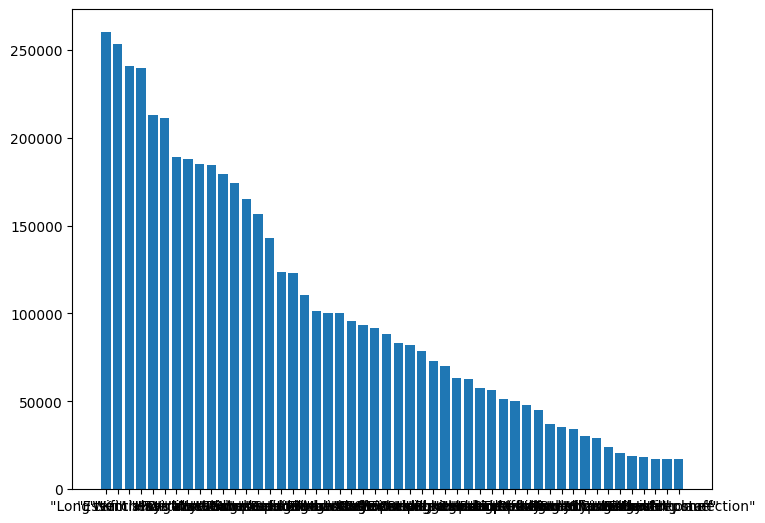

In [6]:
sorted_words = sorted(words.items(), key=lambda x:-x[1])

keyz, valuez = zip(*sorted_words)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(keyz[:50], valuez[:50])
plt.show()

In [7]:
new_atributes = keyz[:30]
new_atributes = [string.strip('"') for string in new_atributes]
e = {}
new_atr = pd.DataFrame(e)
for item in new_atributes:
  new_atr[item] = 0

In [8]:
for atr in new_atributes:
  colm = []
  for text in df1['amenities']:
    if text.find(atr) != -1:
      colm.append(1)
    else:
      colm.append(0)
  new_atr[atr] = colm  

In [ ]:
new_atr.shape

(278038, 30)

In [9]:
new_atr.insert(0, 'listing_id', df1['listing_id'])

In [10]:
new_atr.insert(1, 'price', df1['price'])

In [41]:
new_atr.shape

(278038, 32)

In [11]:
new_atr.sample(n=10)

,listing_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance
110838,41806668.0,1500.0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
23837,6750266.0,90.0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
235347,42994875.0,307.0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
30581,4895346.0,151.0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1
127506,21816278.0,40.0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
197441,22113037.0,80.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0
71135,45980700.0,93.0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,1,1
23397,23879225.0,1239.0,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
215295,44301290.0,50.0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
182208,4190929.0,250.0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1


### Data Integration

In [11]:
new_id = df3[['listing_id', 'reviewer_id', 'date']]

In [12]:
merge_db = pd.DataFrame(e)
merge_db = pd.merge(new_id, new_atr, on='listing_id')
merge_db.head(5)

,listing_id,reviewer_id,date,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance
0,11798,11863072,2018-09-30,110.0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1
1,11798,3153099,2019-04-14,110.0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1
2,11798,13021254,2018-06-10,110.0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1
3,11798,74131694,2018-07-01,110.0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1
4,11798,39665778,2018-01-01,110.0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1


## Modeling

### Generate Test Design

In [19]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
features = ['listing_id', 'reviewer_id', 'price','Wifi', 'Essentials', 'Kitchen', 'Long term stays allowed', 'TV', 'Hangers', 
            'Hair dryer', 'Iron', 'Washer', 'Heating', 'Dedicated workspace', 'Shampoo', 'Hot water', 
            'Smoke alarm', 'Air conditioning', 'Dishes and silverware', 'Refrigerator', 'Cooking basics', 
            'Elevator', 'Bed linens', 'Microwave', 'Fire extinguisher', 'Dryer', 'Stove', 'Coffee maker', 
            'Oven', 'First aid kit', 'Carbon monoxide alarm', 'Free parking on premises', 'Private entrance']
X = merge_db[features]
X = X.sample(len(X)//100)

In [14]:
X

,listing_id,reviewer_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance
3771987,22329028,27314203,174.0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3246479,20998466,259210684,1150.0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1
1137373,30198386,222312130,61.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
5129922,21795151,169916606,125.0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0
1071558,5870127,193067448,140.0,1,0,1,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783202,5321844,35495562,64.0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1
5276881,31163325,337048712,69.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2424571,10891357,56714436,680.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0
2370640,14357157,98319181,212.0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


### Build Model

### Time Series Analysis

In [19]:
# For the purposes of time series analysis let us resample the dataset with 500000 random rows.
X_ts = merge_db.sample(500000)

In [21]:
#First, let us convert the date to a format that supports time series analysis:
X_ts['date']

30361      2018-03-23
4551975    2018-07-12
4510432    2018-06-04
1913804    2020-07-23
4381860    2016-05-24
              ...    
3407518    2017-12-03
4084431    2020-12-19
1820390    2020-12-19
290549     2017-04-23
3827961    2020-07-25
Name: date, Length: 500000, dtype: object

In [23]:
X_ts['date'] = pd.to_datetime(merge_db['date'])

In [24]:
X_ts.set_index('date', inplace=True)
X_ts.sort_index(inplace=True)

In [25]:
X_ts.head()

,listing_id,reviewer_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-05-28,5121,2995,60.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2009-05-29,6848,16426,109.0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0
2009-06-30,5396,19995,81.0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2009-07-06,5178,18347,79.0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0
2009-08-09,7801,26220,299.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0


In [26]:
len(X_ts)

500000

<Axes: xlabel='date'>

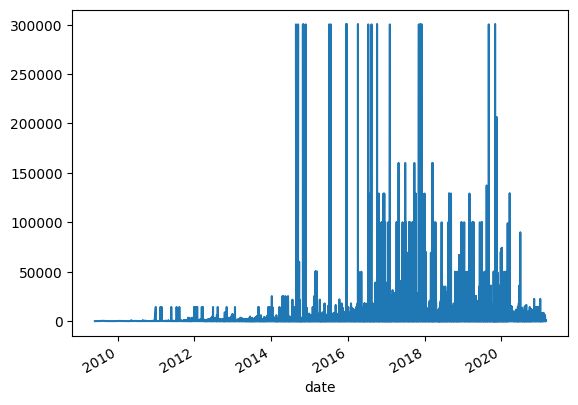

In [27]:
#Let us draw the first time-series of price:
X_ts['price'].plot()

<Axes: xlabel='date'>

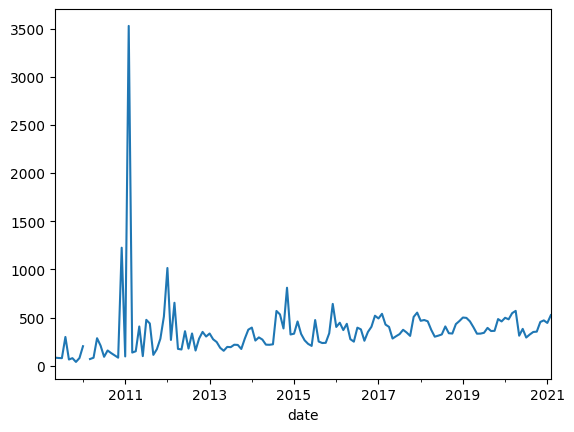

In [28]:
# Data is very hard to understand in that format - let us find the mean over a month and see the prices once again.
X_month = X_ts.resample("M").mean()
X_month['price'].plot()

With this time series we can already make some inferences:

1. **Trend**: we can see that prices are increasing linearly over time, excluding jumps in prices in 2011-2012 and some of 2015. This can be explained by inflation, and ideally it would have been accounted for in the dataset - that is, prices would have been resampled to make sure that features in more recent years are not more valuable to clusterization algorithms than those of the older ones.

2. **Seasonality**: on the graph we can also notice the seasonality of price increases - prices jump up closer to the beginning of the year - that could be explained by Christmas and New Year celebrations. The original dataset also did not account for that, so seasonality might hamper the process of clusterization, pulling appart apartments that were often presented at New Year and those that were more often provided during summer.

<BarContainer object of 12 artists>

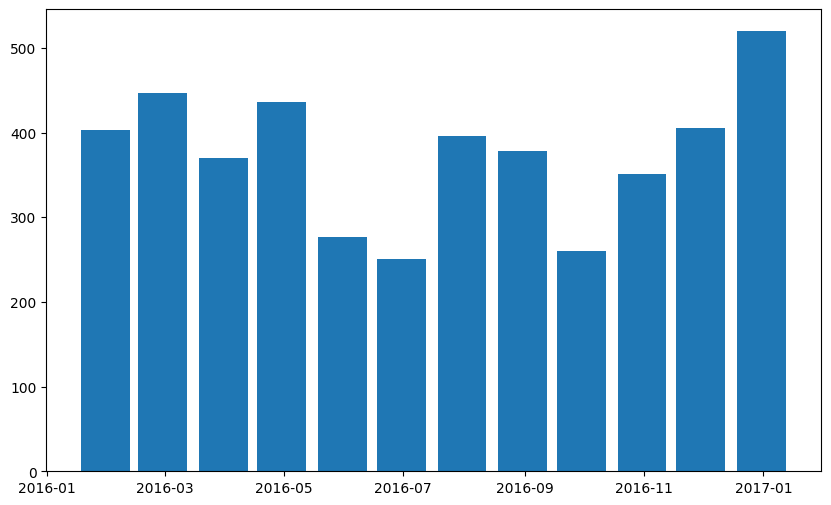

In [29]:
# Seasonality becomes more evident if we look at mean prices in the scope of a single year, 
#so let us provide new graphs covering those scenarios.
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
  
ax.bar(X_month['2016':'2016'].index, 
       X_month.loc['2016':'2016', "price"], 
       width=25, align='center')

<BarContainer object of 12 artists>

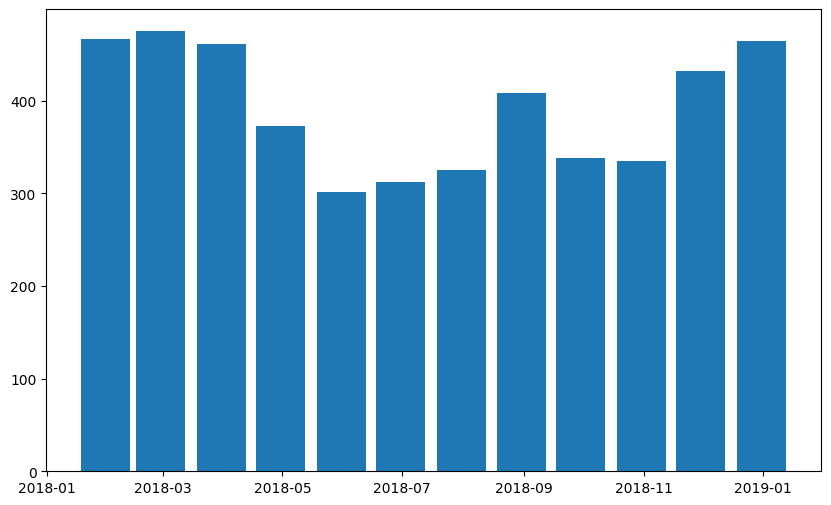

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
  
ax.bar(X_month['2018':'2018'].index, 
       X_month.loc['2018':'2018', "price"], 
       width=25, align='center')

As we can see, prices tend to lower in summer and increase towards January, confirming our prior analysis of seasonality.

<BarContainer object of 12 artists>

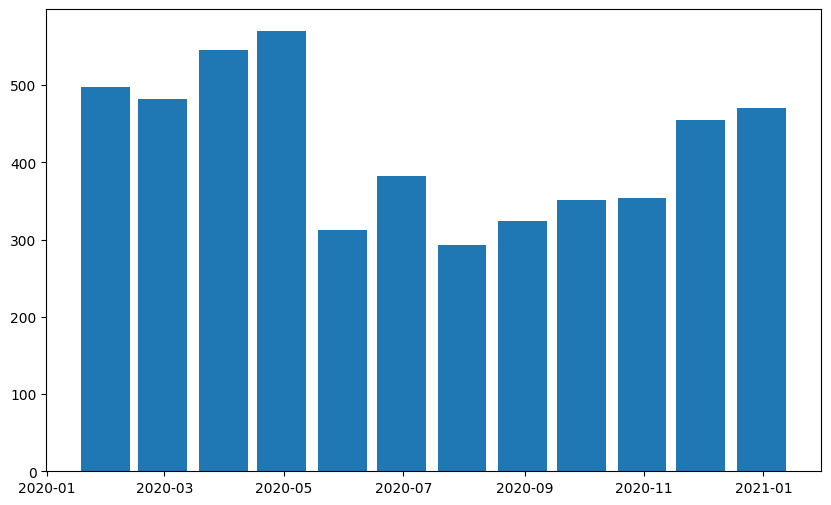

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
  
ax.bar(X_month['2020':'2020'].index, 
       X_month.loc['2020':'2020', "price"], 
       width=25, align='center')

We can see that seasonality holds even during a major crisis, such as COVID-19, which initiated a wave of lockdowns and significantly harmed the business model of Airbnb, confirming its great importance for the data.

Conclusion: both trend and seasonality are very important for the price feature, and have to be taken into account in the future for more effective clusterization.

### KMeans clustering model

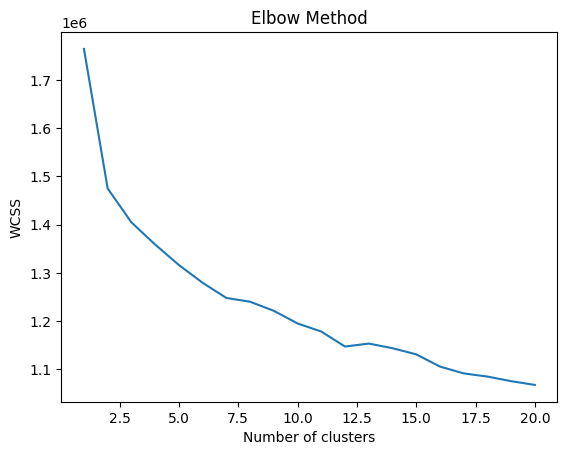

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create an empty list to store the WCSS values for each value of k
wcss = []

# Try k values from 1 to 20
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=100)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5, max_iter = 100)
X['cluster'] = kmeans.fit_predict(X_scaled)

In [28]:
X.sample(n=5)

,listing_id,reviewer_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance,cluster
1612571,19405371,78440521,65.0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,7
5109201,5681860,18923968,66.0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
3513291,34998274,257734714,554.0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4702878,4743909,60502750,14.0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4328526,1346899,21286586,49.0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1


In [29]:
def recommend_listings(reviewer_id, data, n_recommendations=5):
    # Find the cluster of the reviewer's chosen listing
    reviewer_listing = X[X['reviewer_id'] == reviewer_id]
    if reviewer_listing.empty:
        raise ValueError(f"Reviewer with ID {reviewer_id} not found in the dataset.")
    
    reviewer_cluster = reviewer_listing.iloc[0]['cluster']
    
    # Filter listings in the same cluster
    similar_listings = X[X['cluster'] == reviewer_cluster]
    
    # Exclude the listing already chosen by the reviewer
    similar_listings = similar_listings[similar_listings['listing_id'] != reviewer_listing.iloc[0]['listing_id']]
    
    # Return the top n_recommendations listings
    return similar_listings.sample(n_recommendations)

# Example usage:
reviewer_id = 200858385	
recommended_listings = recommend_listings(reviewer_id, X)
recommended_listings

,listing_id,reviewer_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance,cluster
3903292,31126830,19482656,400.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,0,1,9
216293,20531080,14097824,85.0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,9
3929191,34723220,31486474,50.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,9
637330,17262106,4060589,233.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,9
615294,27647271,18336153,1035.0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,9


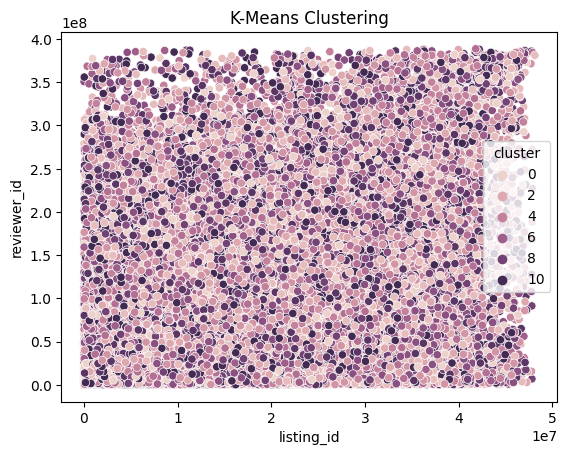

In [30]:
import seaborn as sns

# Plot the data points with different colors representing the clusters
sns.scatterplot(x='listing_id', y='reviewer_id', hue='cluster', data=X)
plt.title('K-Means Clustering')
plt.xlabel('listing_id')
plt.ylabel('reviewer_id')
plt.show()


### DBSCAN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
merge_db = pd.read_csv('merge_db.csv')

# Subset the data for a specific reviewer_id
reviewer_id = 12345
data = merge_db[merge_db['reviewer_id'] == reviewer_id]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 3:].values)

# Apply hierarchical clustering algorithm
model = DBSCAN(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(X)

# Add the cluster labels to the dataset
data['cluster'] = clusters

# Sort the data by date
data = data.sort_values('date')

# Plot the clusters over time
fig, ax = plt.subplots(figsize=(10,5))
for i in range(5):
    cluster_data = data[data['cluster'] == i]
    ax.scatter(cluster_data['date'], cluster_data['price'], label=f'Cluster {i+1}')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(f'Recommendations for Reviewer {reviewer_id}')
plt.show()

# Display the recommended listings for the reviewer
recommended_listings = data.groupby('cluster').apply(lambda x: x.loc[x['price'].idxmin()])['listing_id']
print(f'Recommended listings for Reviewer {reviewer_id}: {recommended_listings.tolist()}')


In [58]:
# Example usage:
reviewer_id = 36167506	
n_recommendations = 5 # choose the number of recommendations you want to generate
recommended_listings = recommend_listings(reviewer_id, X_DB, n_recommendations=n_recommendations)
recommended_listings


,listing_id,reviewer_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance,cluster
4920848,215865,23802423,40.0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,0,-1
3034084,13892411,103756777,210.0,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,-1
3363492,6052071,10541460,308.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,-1
4367455,8818334,27474119,120.0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
3010020,28049699,171274798,800.0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,-1


 ### AgglomerativeClustering

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

features = ['listing_id', 'reviewer_id', 'price','Wifi', 'Essentials', 'Kitchen', 'Long term stays allowed', 'TV', 'Hangers', 
            'Hair dryer', 'Iron', 'Washer', 'Heating', 'Dedicated workspace', 'Shampoo', 'Hot water', 
            'Smoke alarm', 'Air conditioning', 'Dishes and silverware', 'Refrigerator', 'Cooking basics', 
            'Elevator', 'Bed linens', 'Microwave', 'Fire extinguisher', 'Dryer', 'Stove', 'Coffee maker', 
            'Oven', 'First aid kit', 'Carbon monoxide alarm', 'Free parking on premises', 'Private entrance']
X = merge_db[features]
X = X.sample(len(X)//1000)

# Scale the data
'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
'''
# Apply hierarchical clustering algorithm
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(X)
clusters = clusters.astype(int)
X['cluster'] = clusters

In [31]:
X

,listing_id,reviewer_id,price,Wifi,Essentials,Kitchen,Long term stays allowed,TV,Hangers,Hair dryer,Iron,Washer,Heating,Dedicated workspace,Shampoo,Hot water,Smoke alarm,Air conditioning,Dishes and silverware,Refrigerator,Cooking basics,Elevator,Bed linens,Microwave,Fire extinguisher,Dryer,Stove,Coffee maker,Oven,First aid kit,Carbon monoxide alarm,Free parking on premises,Private entrance,cluster
1328740,23268810,147271756,35.0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,2
1370105,3979628,131548315,89.0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4071148,2745552,17977233,400.0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3
4327274,1188902,8968109,69.0,1,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,3
627943,6850505,58016584,125.0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164386,24651290,40101078,200.0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
317010,19538934,41079540,69.0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0
3955161,26373232,160403506,421.0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
3534451,12852702,155906030,419.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,2


In [32]:
# Display the recommended listings for the reviewer
reviewer_id = 147271756
recommended_listings = X.groupby('cluster').apply(lambda x: x.loc[x['price'].idxmin()])['listing_id']
print(f'Recommended listings for Reviewer {reviewer_id}: {recommended_listings.tolist()}')

Recommended listings for Reviewer 147271756: [12884264.0, 34202783.0, 31102.0, 10515869.0, 16473104.0]


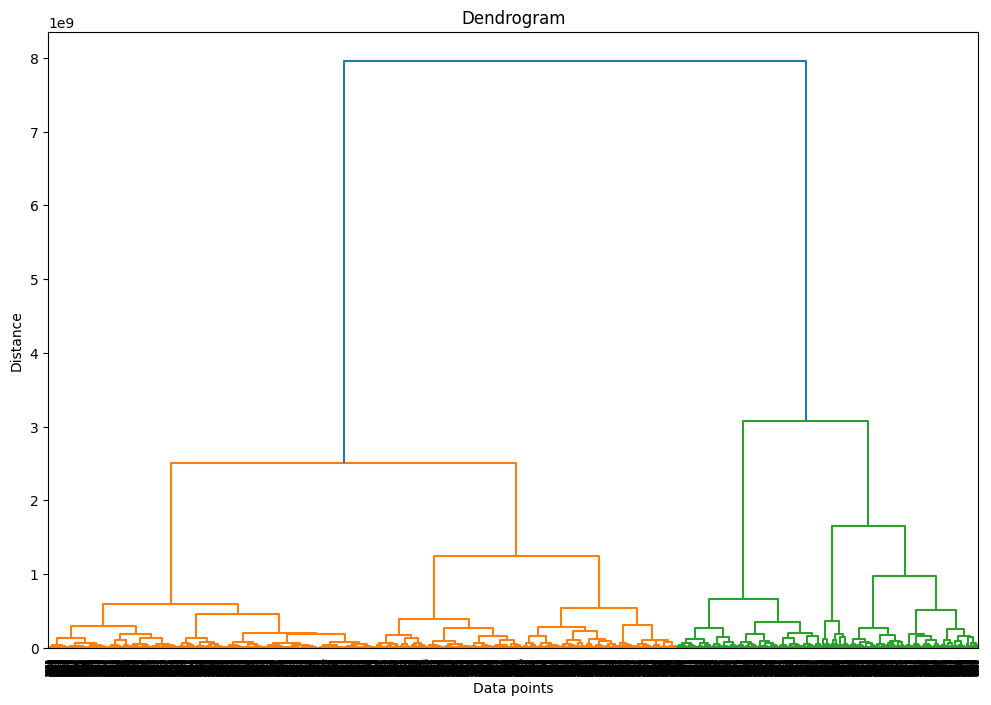

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()